

# Major Non-linear Regression Methods

Non-linear regression is used when the relationship between variables cannot be accurately described by a straight line. Below are the most commonly used non-linear regression models.

---

### **A. Polynomial Regression**
Extends linear regression by adding polynomial terms.

\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon
\]

**Use Case:** When the curve is U-shaped or has multiple bends.  
**Note:** Although it uses polynomial terms, it is still linear in parameters, so technically not fully non-linear.

---

### **B. Exponential Regression**
\[
y = a e^{bx}
\]

**Use Case:** Growth/decay processes like population growth, radioactive decay.  
**Property:** Exponential increase/decrease over time.

---

### **C. Logistic Regression (Non-linear Growth Curve)**
\[
y = \frac{a}{1 + e^{-b(x-c)}}
\]

**Use Case:** Population saturation, disease spread models (S-shaped curve).

---

### **D. Power Regression**
\[
y = a x^b
\]

**Use Case:** Physics and biology (e.g., metabolic rate, scaling laws).

---

### **E. Michaelis-Menten Model**
\[
y = \frac{V_{\max} x}{K_m + x}
\]

**Use Case:** Enzyme kinetics, chemical reactions.

---

### **Comparison Table**

| Method              | Equation                                    | Common Applications                          |
|----------------------|--------------------------------------------|---------------------------------------------|
| Polynomial          | \( y = \beta_0 + \beta_1 x + \dots \)     | Economics, trend analysis, curve fitting   |
| Exponential         | \( y = a e^{bx} \)                        | Population growth, radioactive decay       |
| Logistic            | \( y = \frac{a}{1 + e^{-b(x-c)}} \)       | Population saturation, epidemiology        |
| Power               | \( y = a x^b \)                           | Physics, biology, allometric scaling       |
| Michaelis-Menten    | \( y = \frac{V_{\max} x}{K_m + x} \)      | Biochemistry, enzyme kinetics              |

---

## Non-Linear Regression Methods in Python¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set a consistent style
plt.style.use('seaborn-v0_8')


## 🔹 A. Polynomial Regression

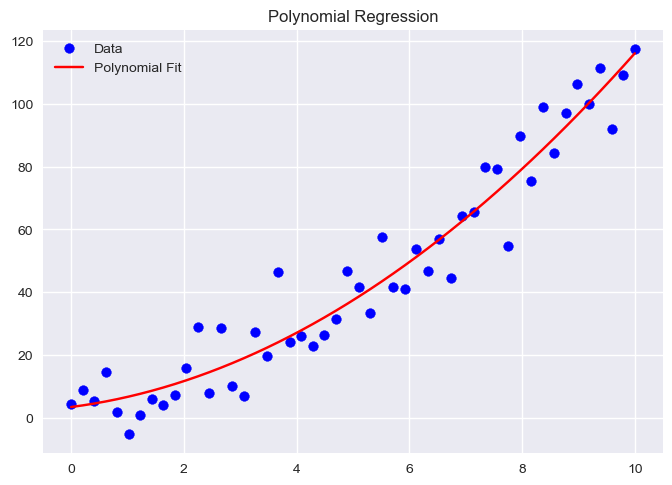

In [2]:
x = np.linspace(0, 10, 50)
y = 3 + 2*x + x**2 + np.random.normal(0, 10, size=x.shape)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.title("Polynomial Regression")
plt.legend()
plt.show()


## 🔹 B. Exponential Regression

Fitted Parameters: a=1.9215984446057315, b=0.26940115789940394


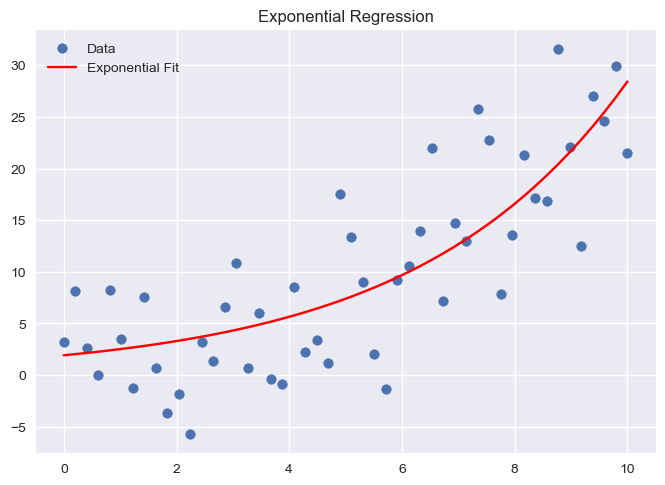

In [3]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

y_exp = exp_func(x, 1.5, 0.3) + np.random.normal(0, 5, len(x))
params, _ = curve_fit(exp_func, x, y_exp, p0=(1, 0.1))
a, b = params
print(f"Fitted Parameters: a={a}, b={b}")
y_fit = exp_func(x, a, b)

plt.scatter(x, y_exp, label='Data')
plt.plot(x, y_fit, 'r', label='Exponential Fit')
plt.title("Exponential Regression")
plt.legend()
plt.show()


### C. Logistic Regression

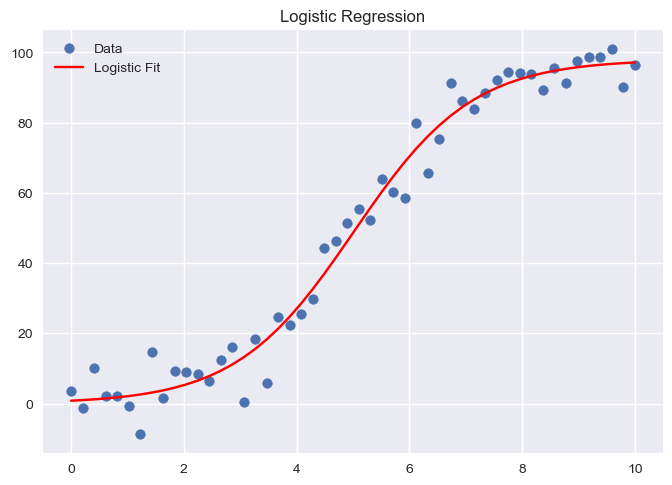

In [4]:
def logistic_func(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

y_logistic = logistic_func(x, 100, 1, 5) + np.random.normal(0, 5, len(x))
params, _ = curve_fit(logistic_func, x, y_logistic, p0=(100, 1, 5))
y_fit = logistic_func(x, *params)

plt.scatter(x, y_logistic, label='Data')
plt.plot(x, y_fit, 'r', label='Logistic Fit')
plt.title("Logistic Regression")
plt.legend()
plt.show()


### D. Power Regression

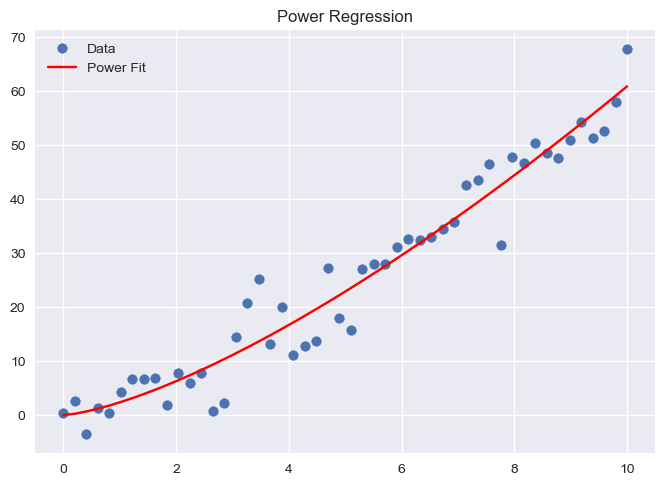

In [5]:
def power_func(x, a, b):
    return a * (x**b)

y_power = power_func(x, 2, 1.5) + np.random.normal(0, 5, len(x))
params, _ = curve_fit(power_func, x, y_power, p0=(1, 1))
y_fit = power_func(x, *params)

plt.scatter(x, y_power, label='Data')
plt.plot(x, y_fit, 'r', label='Power Fit')
plt.title("Power Regression")
plt.legend()
plt.show()


### E. Michaelis-Menten Regression

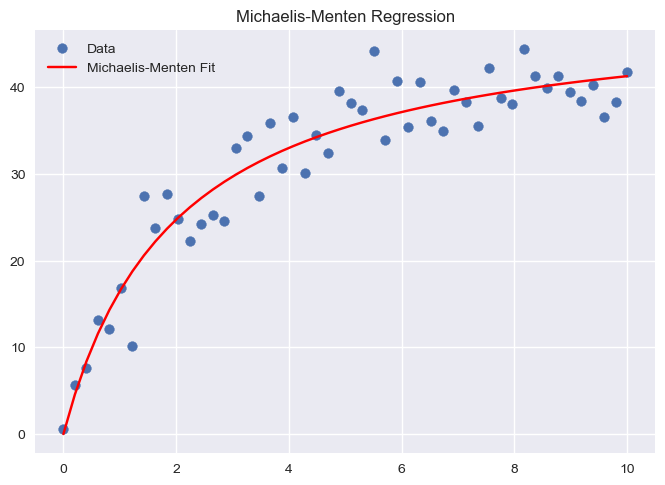

In [6]:
def michaelis_menten(x, Vmax, Km):
    return (Vmax * x) / (Km + x)

y_mm = michaelis_menten(x, 50, 2) + np.random.normal(0, 3, len(x))
params, _ = curve_fit(michaelis_menten, x, y_mm, p0=(50, 2))
y_fit = michaelis_menten(x, *params)

plt.scatter(x, y_mm, label='Data')
plt.plot(x, y_fit, 'r', label='Michaelis-Menten Fit')
plt.title("Michaelis-Menten Regression")
plt.legend()
plt.show()
